In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import yfinance as yf

#from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
#path equals etc... 

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AAPL", "QQQ", "ARKK"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_portfolio.head()

AAPL                                     ARKK  \
                             open    high     low   close    volume   open   
time                                                                         
2017-05-01 00:00:00-04:00  145.10  147.20  144.96  146.56  25669350  25.48   
2017-05-02 00:00:00-04:00  147.54  148.09  146.84  147.47  31308344  25.91   
2017-05-03 00:00:00-04:00  145.59  147.49  144.27  147.06  38855247  25.75   
2017-05-04 00:00:00-04:00  146.55  147.14  145.81  146.54  18926882  25.74   
2017-05-05 00:00:00-04:00  146.76  148.98  146.76  148.96  22675122  25.77   

                                                                QQQ          \
                              high      low    close volume    open    high   
time                                                                          
2017-05-01 00:00:00-04:00  25.7199  25.3504  25.7100  35949  135.05  135.96   
2017-05-02 00:00:00-04:00  25.9100  25.5700  25.6699  21238  135.90  136.01   
2017-05-03 00:00:00-04:00  25.7700  25.4500  25.6012   7956  135.68  135.71   
2017-05-04 00:00:00-04:00  25.7400  25.4019  25.5000  13170  135.54  135.96   
2017-05-05 00:00:00-04:00  25.7700  25.5000  25.7600  12850  135.92  136.07   

                                                     
                              low   close    volume  
time                                                 
2017-05-01 00:00:00-04:00  134.97  135.73  17204770  
2017-05-02 00:00:00-04:00  135.54  135.96  14449779  
2017-05-03 00:00:00-04:00  135.16  135.53  15918064  
2017-05-04 00:00:00-04:00  135.10  135.57  13641296  
2017-05-05 00:00:00-04:00  135.42  136.07  12108993

In [5]:
#df_portfolio.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
port_data = pd.DataFrame()

for c in df_portfolio.columns:
    if c[1] in "close":
        port_data[c[0]] = df_portfolio[c[0]][c[1]]

In [6]:
#find the daily returns of each stock in the portfolio
port_data= port_data.pct_change()
port_data= port_data.dropna()

port_data.head()

,AAPL,ARKK,QQQ
time,,,
2017-05-02 00:00:00-04:00,0.006209,-0.001560,0.001695
2017-05-03 00:00:00-04:00,-0.002780,-0.002676,-0.003163
2017-05-04 00:00:00-04:00,-0.003536,-0.003953,0.000295
2017-05-05 00:00:00-04:00,0.016514,0.010196,0.003688
2017-05-08 00:00:00-04:00,0.027189,-0.001203,0.002205


In [7]:
#concat the portfolio into total returns
weights=[1/3, 1/3, 1/3]
weighted_return= (weights * port_data)
portfolio_return = weighted_return.sum(axis=1)
portfolio_return.head()
cumprod_port= (1 + portfolio_return).cumprod()
cumprod_port.head()

time
2017-05-02 00:00:00-04:00    1.002115
2017-05-03 00:00:00-04:00    0.999235
2017-05-04 00:00:00-04:00    0.996839
2017-05-05 00:00:00-04:00    1.006940
2017-05-08 00:00:00-04:00    1.016402
dtype: float64

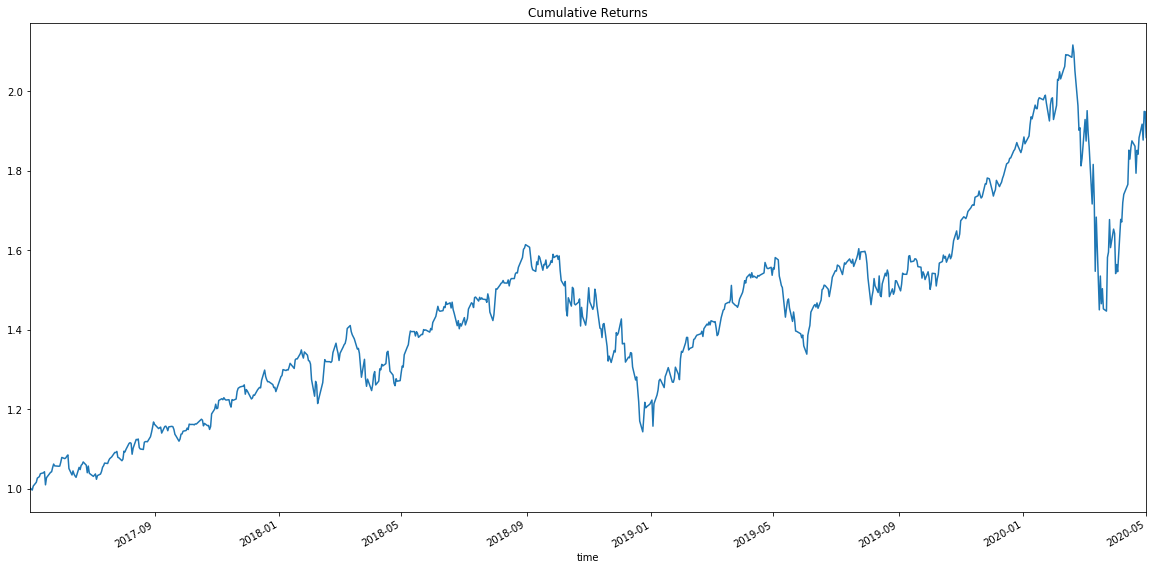

In [8]:
#plot portfolio returns
cumprod_port.plot(figsize=(20, 10), title="Cumulative Returns")

In [ ]:
#Add the ETF Data
#correlate to ETF data
#add 11 industry ETFs


In [ ]:
#quandl.get_table('SHARADAR/SFP', ticker='AADR')

In [10]:
#pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=7ac0f54803bf88ec22654df6637511ed5fb23a4fc1eae69c15a9a1cf8434436b
  Stored in directory: /Users/jacqueline/Library/Caches/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=9df36299e41e6e7dda5f2353ed7ca719e7e288720ebd97111801dce340478786
  Stored in directory: /Users/jacqueline/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [15]:
"""tech_etf = yf.Ticker("XLK")

# get stock info
tech_etf.info

# get historical market data
hist = tech_etf.history(period="max")
hist.to_csv("XLK.csv")
"""

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22,24.990315,25.062611,24.508342,24.713181,300500,0.0,0
1998-12-23,25.255401,25.303598,24.797526,25.303598,338300,0.0,0
1998-12-24,25.303598,25.303598,25.110808,25.207203,243700,0.0,0
1998-12-28,25.592784,25.592784,25.134909,25.279501,309300,0.0,0
1998-12-29,25.399994,25.460241,25.062613,25.351797,123800,0.0,0


In [17]:
hist.to_csv("XLK.csv")